[View in Colaboratory](https://colab.research.google.com/github/RaulMedeiros/Classification_Framework_Visualization/blob/master/Confusion_Matrix_Multiclass.ipynb)

## Create or load some dataset

In [0]:
from sklearn import datasets

n_classes = 5
X, y = datasets.make_classification(n_classes=n_classes,random_state=0,
                                    n_informative=4)

## Returns Any Confusion matrix into the 'sklearn make_scorer'

In [0]:
from sklearn.metrics import confusion_matrix

def conf_mat(y_true, y_pred,x,y): 
    return confusion_matrix(y_true, y_pred)[x,y]

In [0]:
from sklearn.metrics import make_scorer
  
def scoring_conf_mat(n_classes = 2 ,scoring = {}):
    for x in range(n_classes):
        for y in range(n_classes):        
            scoring['cm_'+str(x)+str(y)] = make_scorer(conf_mat,x=x,y=y)
    return scoring

## Choose a generic classifier

In [0]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0)

## Compute metrics (in this case Confusion matrix)

In [12]:
from sklearn.model_selection import cross_validate

scoring = scoring_conf_mat(n_classes)
results=cross_validate(clf, X, y, scoring=scoring,cv=10,verbose=0,
                       return_train_score=False)
print(results)

{'fit_time': array([0.01446009, 0.01848817, 0.01740193, 0.01673508, 0.01767707,
       0.01779795, 0.01739883, 0.01682115, 0.01417899, 0.01742697]), 'test_cm_13': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'test_cm_12': array([0, 0, 0, 1, 0, 0, 1, 0, 2, 0]), 'test_cm_11': array([2, 2, 0, 0, 2, 2, 1, 0, 0, 1]), 'test_cm_10': array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1]), 'test_cm_14': array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0]), 'test_cm_31': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'test_cm_30': array([0, 0, 0, 2, 0, 0, 1, 0, 0, 0]), 'test_cm_33': array([1, 2, 2, 0, 2, 2, 1, 2, 2, 2]), 'test_cm_32': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'test_cm_34': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'test_cm_04': array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 'score_time': array([0.00831699, 0.00781298, 0.00763798, 0.00750995, 0.00750494,
       0.00743508, 0.00758719, 0.00762582, 0.00756383, 0.00867105]), 'test_cm_40': array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 'test_cm_41': array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0]), 'test_cm_42'

## Concatenate Results into a Matrix
#### PS: I'm combining all folds results by summing them.

In [13]:
import numpy as np

def combine_conf_mat_scores(results,n_classes = 2,test=True):
    cm = np.zeros((n_classes, n_classes),dtype=np.int)
    for x in range(n_classes):
        for y in range(n_classes): 
            if (test):
                field = 'test_cm_'                
            else:
                field = 'train_cm_'             
            cm[x,y] = np.sum(results[field+str(x)+str(y)])
    return np.array(cm)

cnf_matrix = combine_conf_mat_scores(results,n_classes)
print(cnf_matrix)

[[ 8  4  4  2  2]
 [ 4 10  4  0  3]
 [ 1  1 14  1  4]
 [ 3  0  0 16  1]
 [ 1  3  3  4  7]]


Confusion matrix, without normalization
[[ 8  4  4  2  2]
 [ 4 10  4  0  3]
 [ 1  1 14  1  4]
 [ 3  0  0 16  1]
 [ 1  3  3  4  7]]
Normalized confusion matrix
[[0.4        0.2        0.2        0.1        0.1       ]
 [0.19047619 0.47619048 0.19047619 0.         0.14285714]
 [0.04761905 0.04761905 0.66666667 0.04761905 0.19047619]
 [0.15       0.         0.         0.8        0.05      ]
 [0.05555556 0.16666667 0.16666667 0.22222222 0.38888889]]


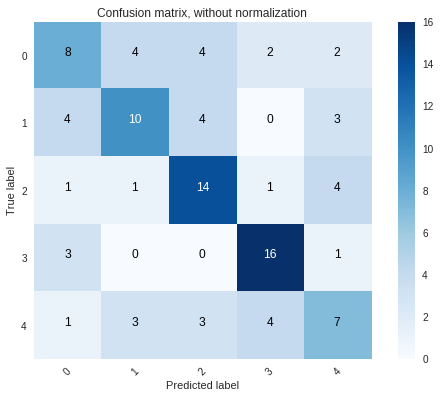

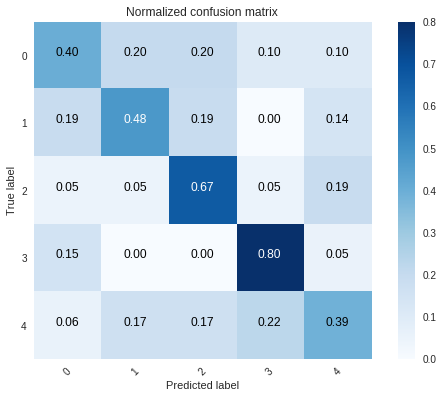

In [14]:
import matplotlib.pyplot as plt
import itertools

'''http://scikit-learn.org/stable/auto_examples/model_selection/
   plot_confusion_matrix.html with minor changes'''

def plot_confusion_matrix(cm, classes=[],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if (not classes):
        classes = list(map(str,np.arange(len(cnf_matrix))))     
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return True

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')

plt.show()